In [21]:
import tensorflow as tf
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [22]:
with open('X_test.pkl', 'rb') as f:
    loaded_array = pickle.load(f)

X = loaded_array

with open('y_test.pkl', 'rb') as f:
    loaded_array = pickle.load(f)

y = loaded_array

In [23]:
print("len(X):", len(X))
print("len(y):", len(y))

len(X): 269
len(y): 269


In [24]:
NUM_CLASSES = 5
y = tf.keras.utils.to_categorical(y, NUM_CLASSES)

In [25]:
X = np.array(X)
y = np.array(y)

In [17]:
model = tf.keras.models.load_model('yamnet_modelV2.h5')

In [18]:
evaluation = model.evaluate(X, y)
print(f'Test Accuracy : {evaluation[1] * 100:.2f}%')

9/9 [==============================] - 2s 113ms/step - loss: 5.6224 - accuracy: 0.4349 - precision: 0.4553 - recall: 0.4164
Test Accuracy : 43.49%


9/9 [==============================] - 1s 81ms/step


<Axes: >

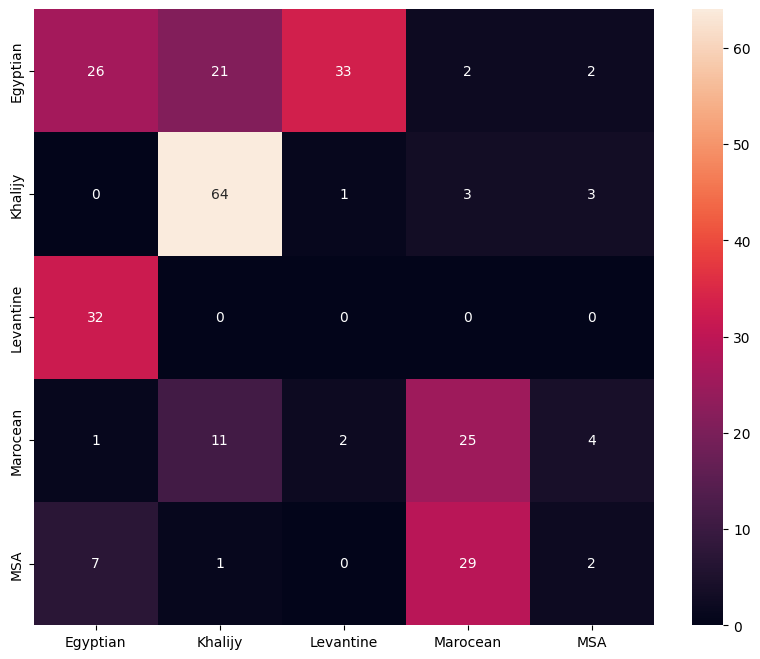

In [19]:
class_names = ["Egyptian", "Khalijy", "Levantine", "moroccancean", "MSA"]

# Predict the values from the testing dataset
Y_pred = model.predict(X)
# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(Y_pred,axis = 1)
# Convert testing observations to one hot vectors
Y_true = np.argmax(y,axis = 1)
# compute the confusion matrix
confusion_mtx = tf.math.confusion_matrix(Y_true, Y_pred_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx, annot=True, fmt='g',xticklabels=class_names, yticklabels=class_names)

In [20]:
from sklearn.metrics import classification_report
print(classification_report(Y_true, Y_pred_classes))

              precision    recall  f1-score   support

           0       0.39      0.31      0.35        84
           1       0.66      0.90      0.76        71
           2       0.00      0.00      0.00        32
           3       0.42      0.58      0.49        43
           4       0.18      0.05      0.08        39

    accuracy                           0.43       269
   macro avg       0.33      0.37      0.34       269
weighted avg       0.39      0.43      0.40       269

